In [1]:
import os

In [2]:
data_dir='C:\\Users\\DELL\\Desktop\\tensorflow_course\\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from matplotlib.image import imread

In [9]:
test_path = data_dir + '\\test\\'
train_path =data_dir + '\\train\\'

In [10]:
test_path

'C:\\Users\\DELL\\Desktop\\tensorflow_course\\cell_images\\test\\'

In [13]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [14]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path + 'parasitized' )[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
para_cell=train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png' 


In [21]:
para_cell

'C:\\Users\\DELL\\Desktop\\tensorflow_course\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

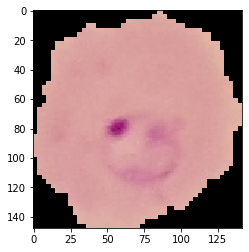

In [24]:
plt.imshow(imread(para_cell))

In [26]:
os.listdir(train_path + 'uninfected'  )[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [27]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

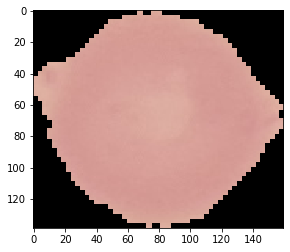

In [30]:
plt.imshow(imread(uninfected_cell))

In [31]:
pwd

'C:\\Users\\DELL\\Desktop\\tensorflow_course\\TF_2_Notebooks_and_Data\\04-CNNs'

In [32]:
len(os.listdir(train_path + 'parasitized'))

12480

In [33]:
len(os.listdir(train_path + 'uninfected'))

12480

In [34]:
dim1 =[]
dim2= []

for image_filename in os.listdir(test_path + 'uninfected'):
    img=imread(test_path + 'uninfected\\' + image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

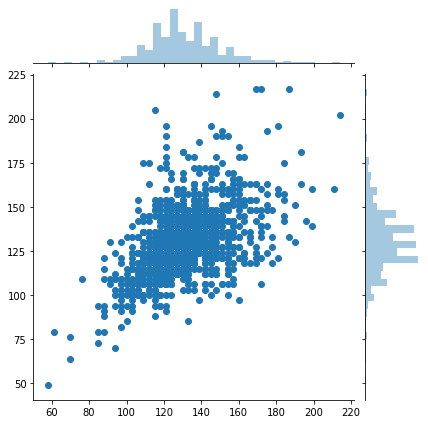

In [37]:
sns.jointplot(dim1,dim2)

In [38]:
np.mean(dim1)

130.92538461538462

In [39]:
np.mean(dim2)

130.75

In [40]:
image_shape=(130,130,3)

In [41]:
130*130*3

50700

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
imread(para_cell).max()

0.9098039

In [52]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                              fill_mode='nearest')

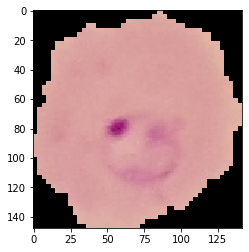

In [60]:
para_img=imread(para_cell)
plt.imshow(para_img)

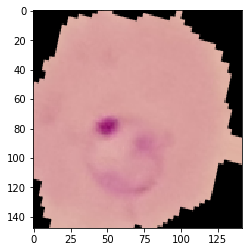

In [64]:
plt.imshow(image_gen.random_transform(para_img))

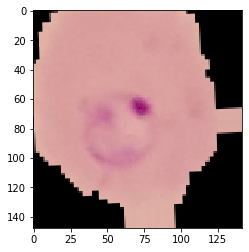

In [70]:
plt.imshow(image_gen.random_transform(para_img))

In [71]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [72]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [79]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [80]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [84]:
batch_size=16

In [86]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [88]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [89]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [90]:
from tensorflow.keras.models import load_model 

In [91]:
model = load_model('malaria_detector.h5')

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [94]:
model.evaluate_generator(test_image_gen)

[1.8728340396750756, 0.87576926]

In [95]:
model.metrics_names

['loss', 'accuracy']

In [97]:
pred=model.predict_generator(test_image_gen)

In [98]:
pred

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [0.9704156],
       [1.       ],
       [0.       ]], dtype=float32)

In [99]:
predictions = pred > 0.5

In [100]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [101]:
len(pred)

2600

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [104]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [105]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1271,   29],
       [ 304,  996]], dtype=int64)